In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D ,Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

import numpy as np
import os

## Data Preperation
We initially import the data and convert it into grayscale imagery so they can be processed by MLP model.


In [3]:
# DATA LOADING
!wget -q https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
!wget -q https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip
!unzip -qq Flickr8k_Dataset.zip
!unzip -qq Flickr8k_text.zip
!rm Flickr8k_Dataset.zip Flickr8k_text.zip

In [12]:
IMAGES_PATH = '/content/'
IMAGE_SIZE = (255, 255)
BATCH_SIZE = 32
BATCH_SIZE_TRAIN = 32

In [13]:
val_df = pd.read_csv('/content/drive/MyDrive/Deep Learning Data/valid_image_class.csv')
val_df['Image Path'] = val_df['Image Path'].apply(lambda x: os.path.join(IMAGES_PATH, x))

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='Image Path',
    y_col='Label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    #grayscale
    color_mode='grayscale'
)

Found 1529 validated image filenames belonging to 5 classes.


In [14]:
train_df = pd.read_csv('/content/drive/MyDrive/Deep Learning Data/train_image_class.csv')
train_df['Image Path'] = train_df['Image Path'].apply(lambda x: os.path.join(IMAGES_PATH, x))

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='Image Path',  #DataFrame column name
    y_col='Label',       #DataFrame column name
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE_TRAIN,
    class_mode='categorical',
    #grayscale
    color_mode='grayscale'
)

Found 6114 validated image filenames belonging to 5 classes.


# Multi-layer perceptron networks

In [ ]:
FLATTEN_SIZE = 255 * 255

model = Sequential()
model.add(Flatten(input_shape=(255, 255,1)))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(
     optimizer='adam',
     loss='categorical_crossentropy',
     metrics=['accuracy']
)


model.fit(
     train_generator,
     epochs=20,
     validation_data=val_generator
)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 46s 232ms/step - accuracy: 0.4401 - loss: 4.3004 - val_accuracy: 0.5265 - val_loss: 1.2187
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 40s 211ms/step - accuracy: 0.5098 - loss: 1.2835 - val_accuracy: 0.4153 - val_loss: 1.2570
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.5164 - loss: 1.2592 - val_accuracy: 0.3211 - val_loss: 1.2763
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 42s 217ms/step - accuracy: 0.5305 - loss: 1.1920 - val_accuracy: 0.5330 - val_loss: 1.1780
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 39s 204ms/step - accuracy: 0.5314 - loss: 1.1734 - val_accuracy: 0.5239 - val_loss: 1.1804
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 39s 194ms/step - accuracy: 0.5449 - loss: 1.1593 - val_accuracy: 0.4827 - val_loss: 1.1951
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 39s 201ms/step - accuracy: 0.5430 - loss: 1.1659 - val_accuracy: 0.5330 - val_loss: 1.1991
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 41s 215ms/step - accuracy: 0.5431 - loss: 1

In [ ]:
# Evaluate on training set
score_MLP1_train = model.evaluate(train_generator, verbose=0)

# Evaluate on validation set
score_MLP1_val = model.evaluate(val_generator, verbose=0)

# Print results with rounding
print('Train Loss:', round(score_MLP1_train[0], 4))
print('Train Accuracy:', round(score_MLP1_train[1], 4))
print('Val Loss:', round(score_MLP1_val[0], 4))
print('Val Accuracy:', round(score_MLP1_val[1], 4))

Train Loss: 1.0805
Train Accuracy: 0.5828
Val Loss: 1.1625
Val Accuracy: 0.5252


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop based on validation loss because ff val_loss stops decreasing or starts increasing, the model might be overfitting. Lower val_loss means the model makes better predictions overall.
    patience=3,          # Wait 5 epochs before stopping if no improvement
    restore_best_weights=True  # Revert to best model
)

model1 = Sequential()

model1.add(Flatten(input_shape=(255, 255, 1)))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(5, activation='softmax'))


model1.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model1.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 45s 226ms/step - accuracy: 0.4953 - loss: 2.5989 - val_accuracy: 0.5337 - val_loss: 1.4667
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 43s 224ms/step - accuracy: 0.5462 - loss: 1.4304 - val_accuracy: 0.5337 - val_loss: 1.3380
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 45s 234ms/step - accuracy: 0.5408 - loss: 1.3143 - val_accuracy: 0.5337 - val_loss: 1.2469
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 43s 225ms/step - accuracy: 0.5430 - loss: 1.2326 - val_accuracy: 0.5337 - val_loss: 1.2029
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 44s 228ms/step - accuracy: 0.5369 - loss: 1.2060 - val_accuracy: 0.5337 - val_loss: 1.1869
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 43s 226ms/step - accuracy: 0.5596 - loss: 1.1632 - val_accuracy: 0.5337 - val_loss: 1.1811
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 44s 227ms/step - accuracy: 0.5518 - loss: 1.1629 - val_accuracy: 0.5337 - val_loss: 1.1788
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 43s 225ms/step - accuracy: 0.5367 - loss: 1

In [ ]:
# Evaluate on training set
score_MLP2_train = model1.evaluate(train_generator, verbose=0)

# Evaluate on validation set
score_MLP2_val = model1.evaluate(val_generator, verbose=0)

# Print results with rounding
print('Train Loss:', round(score_MLP2_train[0], 4))
print('Train Accuracy:', round(score_MLP2_train[1], 4))
print('Val Loss:', round(score_MLP2_val[0], 4))
print('Val Accuracy:', round(score_MLP2_val[1], 4))

Train Loss: 1.1618
Train Accuracy: 0.5465
Val Loss: 1.175
Val Accuracy: 0.5337


# Convolutional Neural Network

In [15]:
train_df = pd.read_csv('/content/drive/MyDrive/Deep Learning Data/train_image_class.csv')
train_df['Image Path'] = train_df['Image Path'].apply(lambda x: os.path.join(IMAGES_PATH, x))

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='Image Path',  #DataFrame column name
    y_col='Label',       #DataFrame column name
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE_TRAIN,
    class_mode='categorical',
    color_mode='rgb'
)

val_df = pd.read_csv('/content/drive/MyDrive/Deep Learning Data/valid_image_class.csv')
val_df['Image Path'] = val_df['Image Path'].apply(lambda x: os.path.join(IMAGES_PATH, x))

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='Image Path',  #DataFrame column name
    y_col='Label',       #DataFrame column name
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)

Found 6114 validated image filenames belonging to 5 classes.
Found 1529 validated image filenames belonging to 5 classes.


In [ ]:
model_cnn = Sequential()

model_cnn.add(Conv2D(16, (4, 4), activation='elu', padding='valid', input_shape=(255, 255, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'))

model_cnn.add(Conv2D(64, (2, 2), activation=None, padding='valid'))
model_cnn.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'))

model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(5, activation='softmax'))

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)

model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 16)        │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 252, 252, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 251, 251, 64)        │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 251, 251, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 250, 250, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4000000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     512,000,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 512,005,717 (1.91 GB)

 Trainable params: 512,005,717 (1.91 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

# Define TensorBoard callback to log the training process
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model with the TensorBoard callback
history_cnn = model_cnn.fit(
    train_generator,          # Training data generator
    epochs=20,                # Number of epochs
    batch_size=128,           # Batch size
    validation_data=val_generator,  # Validation data generator
    callbacks=[tensorboard_callback]  # TensorBoard callback
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.4185 - loss: 50.4944

In [ ]:
# Evaluate on training set
score_cnn_train = model_cnn.evaluate(train_generator, verbose=0)

# Evaluate on validation set
score_cnn_val = model_cnn.evaluate(val_generator, verbose=0)

# Print results with rounding
print('Train Loss:', round(score_cnn_train[0], 4))
print('Train Accuracy:', round(score_cnn_train[1], 4))
print('Val Loss:', round(score_cnn_val[0], 4))
print('Val Accuracy:', round(score_cnn_val[1], 4))

Train Loss: 0.014
Train Accuracy: 0.9985
Val Loss: 3.5942
Val Accuracy: 0.518


In [ ]:
# Load the TensorBoard extension and start it
%load_ext tensorboard
%tensorboard --logdir ./logs

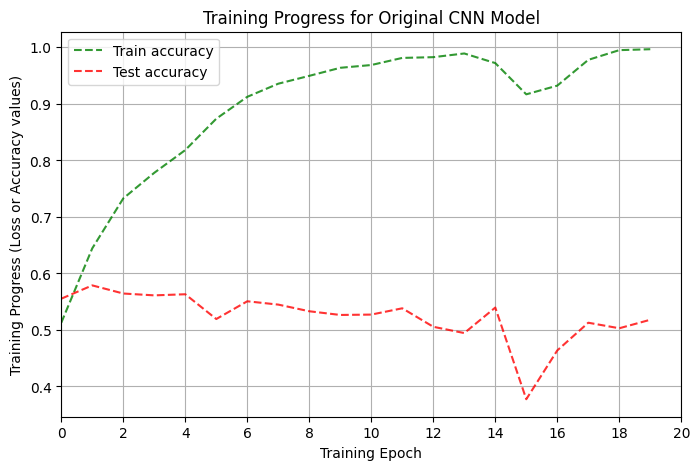

In [ ]:
def plot_accuracy(history, model_name):
    plt.figure(figsize=(8, 5))

    # Plot accuracy
    plt.plot(history.history['accuracy'], 'g--', label="Train accuracy", alpha=0.8)
    plt.plot(history.history['val_accuracy'], 'r--', label="Test accuracy", alpha=0.8)

    # Set x-axis range and ticks every 2 epochs
    plt.xticks(np.arange(0, 21, 2))  # Ensures ticks at [0, 2, 4, ..., 20]
    plt.xlim([0, 20])  # Ensures the x-axis is from 0 to 20

    plt.title(f"Training Progress for {model_name}")
    plt.xlabel("Training Epoch")
    plt.ylabel("Training Progress (Accuracy values)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy(history_cnn, "Original CNN Model")

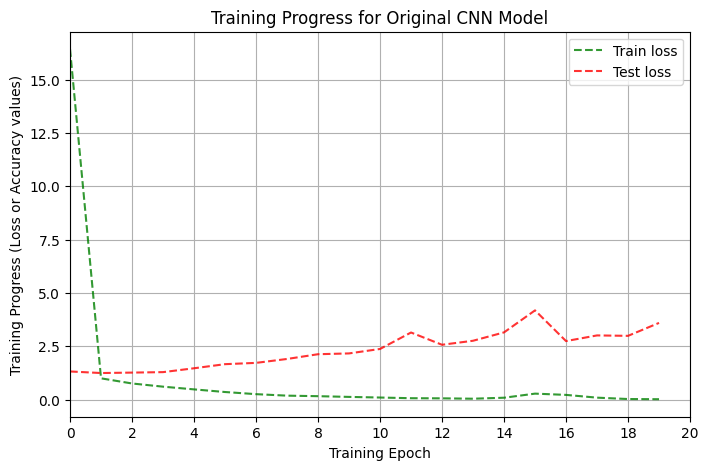

In [ ]:
def plot_loss(history, model_name):
    plt.figure(figsize=(8, 5))

    # Plot accuracy
    plt.plot(history.history['loss'], 'g--', label="Train loss", alpha=0.8)
    plt.plot(history.history['val_loss'], 'r--', label="Test loss", alpha=0.8)

    # Set x-axis range and ticks every 2 epochs
    plt.xticks(np.arange(0, 21, 2))  # Ensures ticks at [0, 2, 4, ..., 20]
    plt.xlim([0, 20])  # Ensures the x-axis is from 0 to 20

    plt.title(f"Training Progress for {model_name}")
    plt.xlabel("Training Epoch")
    plt.ylabel("Training Progress (Loss values)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history_cnn, "Original CNN Model")

# Experiment one: Adding Batch Normalization & Dropout

In [ ]:
model_exp1 = Sequential()

model_exp1.add(Conv2D(16, (4, 4), activation='elu', padding='valid', input_shape=(255, 255, 3)))
model_exp1.add(BatchNormalization())
model_exp1.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'))

model_exp1.add(Conv2D(64, (2, 2), activation=None, padding='valid'))
model_exp1.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model_exp1.add(BatchNormalization())
model_exp1.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'))

model_exp1.add(Flatten())

model_exp1.add(Dense(128, activation='relu'))
model_exp1.add(BatchNormalization())
model_exp1.add(Dropout(0.3))

model_exp1.add(Dense(5, activation='softmax'))

model_exp1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_exp1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 16)        │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 252, 252, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 252, 252, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 251, 251, 64)        │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 251, 251, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 251, 251, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 250, 250, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4000000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     512,000,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 512,006,549 (1.91 GB)

 Trainable params: 512,006,133 (1.91 GB)

 Non-trainable params: 416 (1.62 KB)

In [ ]:
model_exp1.fit(
    train_generator,  # Training data generator
    epochs=20,        # Number of training epochs
    batch_size = 128,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 87s 366ms/step - accuracy: 0.3733 - loss: 2.1085 - val_accuracy: 0.2923 - val_loss: 1.5849
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 51s 262ms/step - accuracy: 0.5741 - loss: 1.1499 - val_accuracy: 0.5847 - val_loss: 1.1502
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 46s 240ms/step - accuracy: 0.5933 - loss: 1.0570 - val_accuracy: 0.6043 - val_loss: 1.0829
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 50s 262ms/step - accuracy: 0.6417 - loss: 0.9269 - val_accuracy: 0.5742 - val_loss: 1.2877
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 46s 241ms/step - accuracy: 0.7045 - loss: 0.7679 - val_accuracy: 0.5827 - val_loss: 1.1424
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 47s 242ms/step - accuracy: 0.8272 - loss: 0.5144 - val_accuracy: 0.5245 - val_loss: 1.6630
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 47s 245ms/step - accuracy: 0.9180 - loss: 0.2599 - val_accuracy: 0.5612 - val_loss: 1.3880
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 46s 240ms/step - accuracy: 0.9713 - loss: 0

In [ ]:
# Evaluate on training set
score_exp1_train = model_exp1.evaluate(train_generator, verbose=0)

# Evaluate on validation set
score_exp1_val = model_exp1.evaluate(val_generator, verbose=0)

# Print results with rounding
print('Train Loss:', round(score_exp1_train[0], 4))
print('Train Accuracy:', round(score_exp1_train[1], 4))
print('Val Loss:', round(score_exp1_val[0], 4))
print('Val Accuracy:', round(score_exp1_val[1], 4))

Train Loss: 0.0131
Train Accuracy: 0.999
Val Loss: 1.9316
Val Accuracy: 0.5625


# Experiment two: Decreasing Learning Rate & Increasing Dropout Rate

In [ ]:
model_exp2 = Sequential()

model_exp2.add(Conv2D(16, (4, 4), activation='elu', padding='valid', input_shape=(255, 255, 3)))
model_exp2.add(BatchNormalization())
model_exp2.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'))

model_exp2.add(Conv2D(64, (2, 2), activation=None, padding='valid'))
model_exp2.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model_exp2.add(BatchNormalization())
model_exp2.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid'))

model_exp2.add(Flatten())

model_exp2.add(Dense(128, activation='relu'))
model_exp2.add(BatchNormalization())
model_exp2.add(Dropout(0.4))

model_exp2.add(Dense(5, activation='softmax'))

model_exp2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_exp2.summary()

c:\ProgramData\anaconda3\envs\py\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\ProgramData\anaconda3\envs\py\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 255, 255, 16)   │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 255, 255, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 255, 255, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 64)   │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 254, 254, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 254, 254, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 253, 253, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096576)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │   524,361,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 524,368,277 (1.95 GB)

 Trainable params: 524,367,861 (1.95 GB)

 Non-trainable params: 416 (1.62 KB)

In [ ]:
model_exp2.fit(
    train_generator,  # Training data generator
    epochs=20,        # Number of training epochs
    batch_size = 128,
    validation_data=val_generator,
)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1085s 6s/step - accuracy: 0.2951 - loss: 2.2768 - val_accuracy: 0.3067 - val_loss: 1.4292
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1184s 6s/step - accuracy: 0.5150 - loss: 1.3378 - val_accuracy: 0.5507 - val_loss: 1.1795
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1186s 6s/step - accuracy: 0.6018 - loss: 1.1098 - val_accuracy: 0.5965 - val_loss: 1.0831
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1182s 6s/step - accuracy: 0.6359 - loss: 0.9629 - val_accuracy: 0.5664 - val_loss: 1.1524
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1185s 6s/step - accuracy: 0.7172 - loss: 0.7537 - val_accuracy: 0.5867 - val_loss: 1.1694
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1197s 6s/step - accuracy: 0.8284 - loss: 0.4852 - val_accuracy: 0.5579 - val_loss: 1.2799
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 1207s 6s/step - accuracy: 0.9107 - loss: 0.2902 - val_accuracy: 0.5651 - val_loss: 1.3618
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 999s 5s/step - accuracy: 0.9360 - loss: 0.2298 - v

In [ ]:
# Evaluate on training set
score_exp2_train = model_exp2.evaluate(train_generator, verbose=0)

# Evaluate on validation set
score_exp2_val = model_exp2.evaluate(val_generator, verbose=0)

# Print results with rounding
print('Train Loss:', round(score_exp2_train[0], 4))
print('Train Accuracy:', round(score_exp2_train[1], 4))
print('Val Loss:', round(score_exp2_val[0], 4))
print('Val Accuracy:', round(score_exp2_val[1], 4))

Train Loss: 0.019
Train Accuracy: 0.9962
Val Loss: 2.7488
Val Accuracy: 0.5507


# Experiement three: Decreasing Model Complexity (Less Filters & Layers)

In [ ]:
model_exp3 = Sequential()

model_exp3.add(Conv2D(8, (4, 4), activation='elu', padding='valid', input_shape=(255, 255, 3)))
model_exp3.add(BatchNormalization())
model_exp3.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'))

model_exp3.add(Conv2D(32, (2, 2), activation='elu', padding='same', input_shape=(255, 255, 3)))
model_exp3.add(BatchNormalization())
model_exp3.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding='same'))

model_exp3.add(Flatten())

model_exp3.add(Dense(128, activation='relu'))
model_exp3.add(BatchNormalization())
model_exp3.add(Dropout(0.4))

model_exp3.add(Dense(5, activation='softmax'))

model_exp3.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_exp3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 255, 255, 8)         │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 255, 255, 8)         │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 255, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 255, 255, 32)        │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 255, 255, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2080800)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     266,342,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,345,293 (1016.03 MB)

 Trainable params: 266,344,957 (1016.03 MB)

 Non-trainable params: 336 (1.31 KB)

In [ ]:
model_exp3.fit(
    train_generator,  # Training data generator
    epochs=20,        # Number of training epochs
    validation_data=val_generator,
    batch_size = 32
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 63s 264ms/step - accuracy: 0.3096 - loss: 2.5212 - val_accuracy: 0.3028 - val_loss: 1.4902
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 40s 207ms/step - accuracy: 0.4883 - loss: 1.3890 - val_accuracy: 0.3983 - val_loss: 1.3778
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 41s 212ms/step - accuracy: 0.5738 - loss: 1.1229 - val_accuracy: 0.4872 - val_loss: 1.2997
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 43s 222ms/step - accuracy: 0.6397 - loss: 0.9635 - val_accuracy: 0.5239 - val_loss: 1.3589
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 40s 208ms/step - accuracy: 0.6908 - loss: 0.8293 - val_accuracy: 0.4971 - val_loss: 1.2980
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 43s 222ms/step - accuracy: 0.7811 - loss: 0.6021 - val_accuracy: 0.5729 - val_loss: 1.3402
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 40s 208ms/step - accuracy: 0.8356 - loss: 0.4747 - val_accuracy: 0.5284 - val_loss: 2.3801
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 39s 199ms/step - accuracy: 0.8795 - loss: 0

In [ ]:
# Evaluate on training set
score_exp3_train = model_exp3.evaluate(train_generator, verbose=0)

# Evaluate on validation set
score_exp3_val = model_exp3.evaluate(val_generator, verbose=0)

# Print results with rounding
print('Train Loss:', round(score_exp3_train[0], 4))
print('Train Accuracy:', round(score_exp3_train[1], 4))
print('Val Loss:', round(score_exp3_val[0], 4))
print('Val Accuracy:', round(score_exp3_val[1], 4))

Train Loss: 0.0209
Train Accuracy: 0.9982
Val Loss: 2.1536
Val Accuracy: 0.5213


# Implement Data Augmentation

In [16]:
# Apply Data Augmentation to Training Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Keep Validation Data Generator Unchanged
val_datagen = ImageDataGenerator(rescale=1./255)

train_df = pd.read_csv('/content/drive/MyDrive/Deep Learning Data/train_image_class.csv')
train_df['Image Path'] = train_df['Image Path'].apply(lambda x: os.path.join(IMAGES_PATH, x))
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='Image Path',  #DataFrame column name
    y_col='Label',       #DataFrame column name
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE_TRAIN,
    class_mode='categorical',
    color_mode='rgb'
)


val_df = pd.read_csv('/content/drive/MyDrive/Deep Learning Data/valid_image_class.csv')
val_df['Image Path'] = val_df['Image Path'].apply(lambda x: os.path.join(IMAGES_PATH, x))

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='Image Path',  #DataFrame column name
    y_col='Label',       #DataFrame column name
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)

Found 6114 validated image filenames belonging to 5 classes.
Found 1529 validated image filenames belonging to 5 classes.


In [ ]:
data_aug = model_exp1.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    batch_size = 128
)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 136s 710ms/step - accuracy: 0.5111 - loss: 1.6134 - val_accuracy: 0.5958 - val_loss: 1.1300
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 131s 681ms/step - accuracy: 0.5641 - loss: 1.1741 - val_accuracy: 0.5984 - val_loss: 1.0665
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 142s 682ms/step - accuracy: 0.5750 - loss: 1.1198 - val_accuracy: 0.5912 - val_loss: 1.0927
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 131s 682ms/step - accuracy: 0.5950 - loss: 1.0652 - val_accuracy: 0.5422 - val_loss: 1.1761
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 132s 683ms/step - accuracy: 0.5986 - loss: 1.0729 - val_accuracy: 0.5670 - val_loss: 1.1126
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 136s 708ms/step - accuracy: 0.6097 - loss: 1.0288 - val_accuracy: 0.6063 - val_loss: 1.0260
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 128s 664ms/step - accuracy: 0.6235 - loss: 1.0191 - val_accuracy: 0.5500 - val_loss: 1.1835
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 127s 664ms/step - accuracy: 0.6249 -

In [ ]:
# Evaluate on training set
score_train_aug = model_exp1.evaluate(train_generator, verbose=0)

# Evaluate on validation set
score_val_aug = model_exp1.evaluate(val_generator, verbose=0)

# Print results with rounding
print('Train Loss:', round(score_train_aug[0], 4))
print('Train Accuracy:', round(score_train_aug[1], 4))
print('Val Loss:', round(score_val_aug[0], 4))
print('Val Accuracy:', round(score_val_aug[1], 4))

Train Loss: 0.9262
Train Accuracy: 0.6524
Val Loss: 0.9859
Val Accuracy: 0.6233


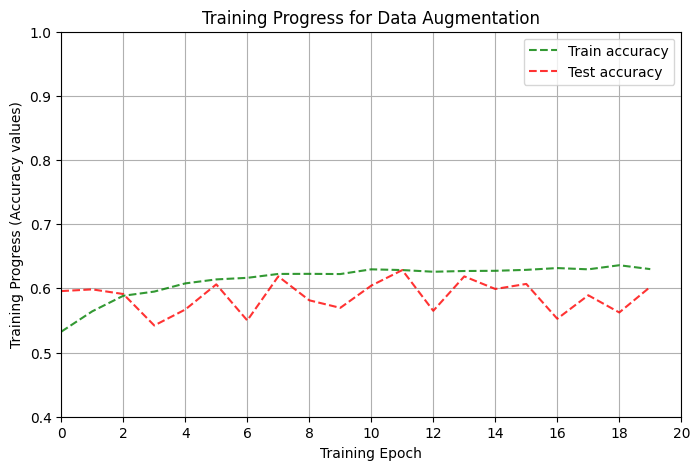

In [ ]:
def plot_accuracy(history, model_name):
    plt.figure(figsize=(8, 5))

    # Plot accuracy
    plt.plot(history.history['accuracy'], 'g--', label="Train accuracy", alpha=0.8)
    plt.plot(history.history['val_accuracy'], 'r--', label="Test accuracy", alpha=0.8)

    # Set x-axis range and ticks every 2 epochs
    plt.xticks(np.arange(0, 21, 2))  # Ensures ticks at [0, 2, 4, ..., 20]
    plt.xlim([0, 20])  # Ensures the x-axis is from 0 to 20
    plt.yticks(np.arange(0.4, 1.1, 0.1))

    plt.title(f"Training Progress for {model_name}")
    plt.xlabel("Training Epoch")
    plt.ylabel("Training Progress (Accuracy values)")
    plt.legend()
    plt.grid(True)
    plt.show()


plot_accuracy(data_aug, "Data Augmentation")

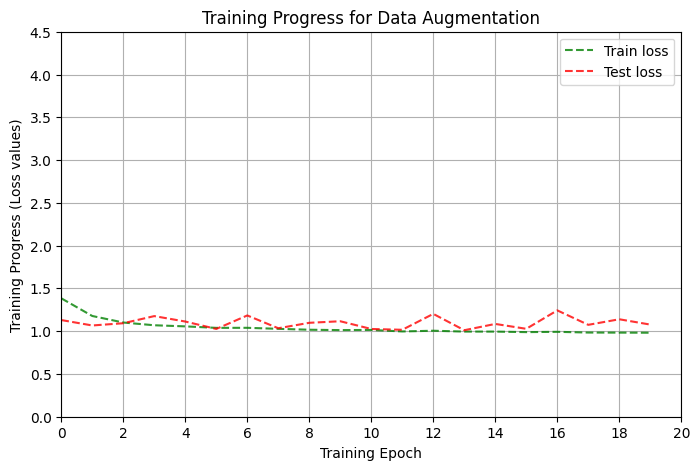

In [ ]:
def plot_loss(history, model_name):
    plt.figure(figsize=(8, 5))

    # Plot accuracy
    plt.plot(history.history['loss'], 'g--', label="Train loss", alpha=0.8)
    plt.plot(history.history['val_loss'], 'r--', label="Test loss", alpha=0.8)

    # Set x-axis range and ticks every 2 epochs
    plt.xticks(np.arange(0, 21, 2))  # Ensures ticks at [0, 2, 4, ..., 20]
    plt.xlim([0, 20])  # Ensures the x-axis is from 0 to 20
    plt.yticks(np.arange(0, 5, 0.5))

    plt.title(f"Training Progress for {model_name}")
    plt.xlabel("Training Epoch")
    plt.ylabel("Training Progress (Loss values)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(data_aug, "Data Augmentation")

# Transfer Learning

In [18]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

IMAGE_SIZE = 255
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Add pooling layer before dense layers
modelontop = Sequential()
modelontop.add(base_model)
modelontop.add(GlobalAveragePooling2D())  # Converts feature maps into a 1D vector
modelontop.add(Dense(512, activation='relu'))
modelontop.add(Dropout(0.25))
modelontop.add(Dense(128, activation='relu'))
modelontop.add(Dropout(0.25))
modelontop.add(Dense(64, activation='relu'))
modelontop.add(Dropout(0.25))
modelontop.add(Dense(5, activation='softmax'))  # Ensure the output matches your classes

modelontop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
modelontop.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,051,589 (57.42 MB)

 Trainable params: 15,051,589 (57.42 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
transfer_learning = modelontop.fit(
        train_generator,
        epochs=20,
        batch_size = 128,
        validation_data= val_generator)

Epoch 1/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.4853 - loss: 3.7600 - val_accuracy: 0.5337 - val_loss: 1.1824
Epoch 2/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 160s 835ms/step - accuracy: 0.5470 - loss: 1.1683 - val_accuracy: 0.5337 - val_loss: 1.1907
Epoch 3/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 161s 839ms/step - accuracy: 0.5444 - loss: 1.1728 - val_accuracy: 0.5337 - val_loss: 1.1940
Epoch 4/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 161s 839ms/step - accuracy: 0.5498 - loss: 1.1871 - val_accuracy: 0.5337 - val_loss: 1.1815
Epoch 5/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 162s 841ms/step - accuracy: 0.5532 - loss: 1.1865 - val_accuracy: 0.5337 - val_loss: 1.1761
Epoch 6/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 162s 844ms/step - accuracy: 0.5402 - loss: 1.1981 - val_accuracy: 0.5337 - val_loss: 1.1748
Epoch 7/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 160s 830ms/step - accuracy: 0.5415 - loss: 1.2001 - val_accuracy: 0.5337 - val_loss: 1.1792
Epoch 8/20
192/192 ━━━━━━━━━━━━━━━━━━━━ 163s 846ms/step - accuracy: 0.5430 - lo